# Week 3: Exploratory Data Analysis (EDA)

**Objective:** Understand basic data mining concepts and tools.

**Topics:** Histograms, boxplots, correlation heatmaps.

**Tasks:**
- Plot distributions of variables
- Identify outliers using boxplots  
- Compute pairwise correlations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
df = pd.read_excel('Lab2_titanic.xlsx')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 1: Plot Distributions of Variables

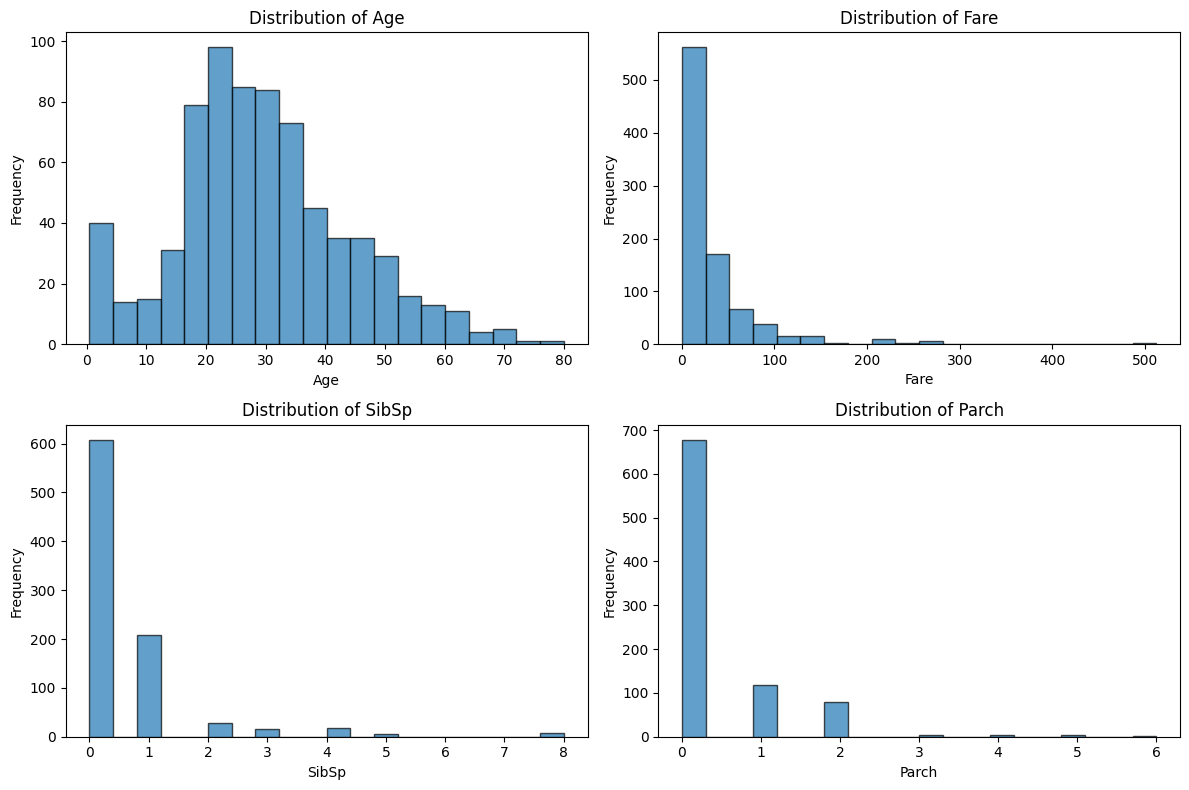

In [ ]:
# Selecting numerical columns for distribution analysis
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Create histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Task 2: Identify Outliers Using Boxplots

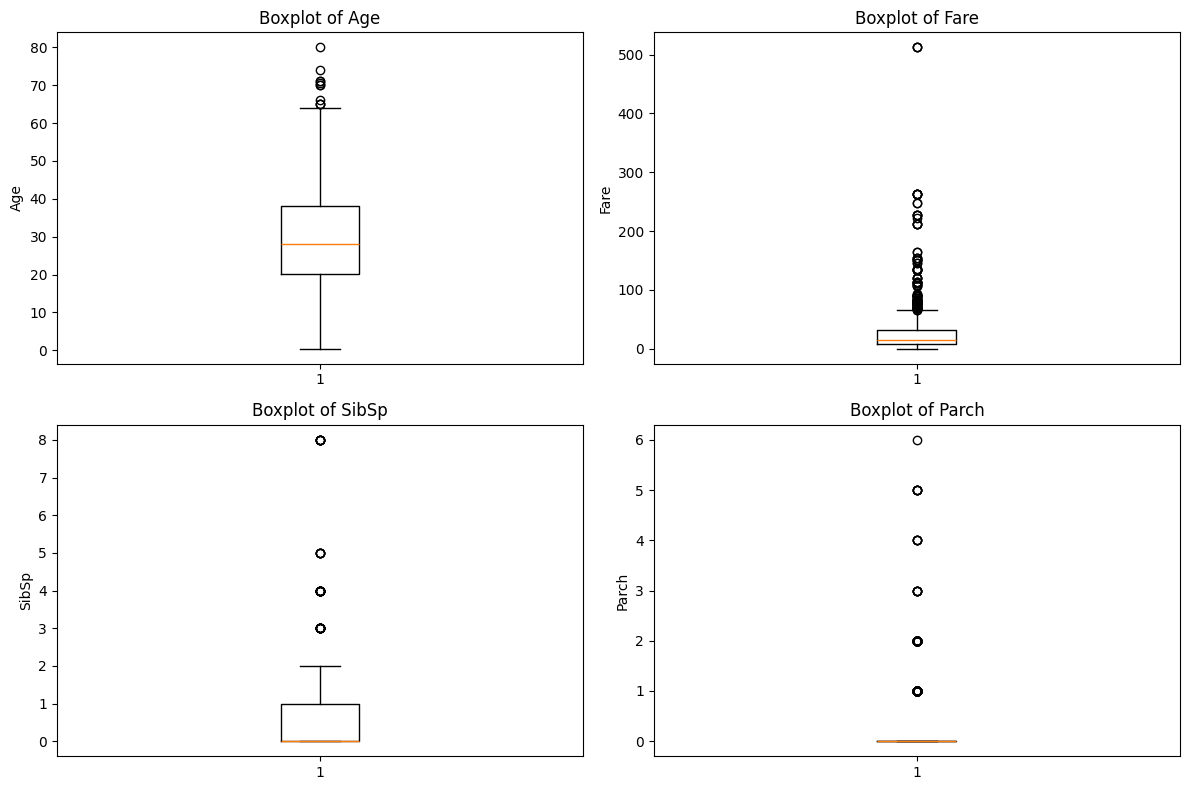

Outlier Analysis:
Age: 11 outliers detected
Fare: 116 outliers detected
SibSp: 46 outliers detected
Parch: 213 outliers detected


In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Outlier Analysis:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers detected")

## Task 3: Compute Pairwise Correlations

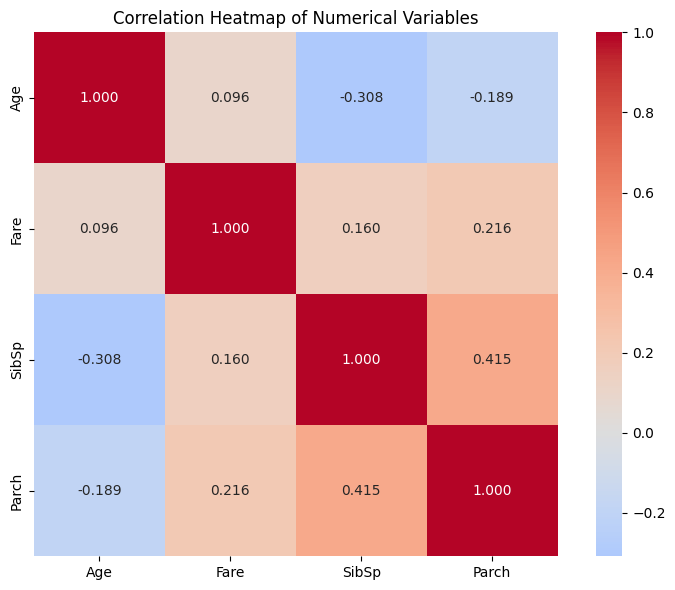

Correlation Summary:
         Age   Fare  SibSp  Parch
Age    1.000  0.096 -0.308 -0.189
Fare   0.096  1.000  0.160  0.216
SibSp -0.308  0.160  1.000  0.415
Parch -0.189  0.216  0.415  1.000


In [12]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlation summary
print("Correlation Summary:")
print(correlation_matrix.round(3))

---

# Lab Report Format

## "Heaven's Light is Our Guide"

### Rajshahi University of Engineering & Technology
### Department of Computer Science & Engineering

## Lab Report-3

**Course Code:** CSE 4120  
**Course Title:** Data Mining Sessional

| **Submitted By-** | **Submitted To-** |
|------------------|-------------------|
| **Name:** Sajidur Rahman Tarafder | Julia Rahman |
| **Department:** CSE | Associate Professor |
| **Roll No:** 2003154 | Department of CSE |
| **Section:** C | RUET |
| **Session:** 2020-21 | |

---

## Experiment Name: Exploratory Data Analysis (EDA)

### Objectives:
Understanding basic data mining concepts and tools through visual analysis of the Titanic dataset using histograms for distribution analysis, boxplots for outlier identification, and correlation heatmaps for relationship analysis.

### Dataset:
Titanic Dataset - Contains passenger information with 891 records and 12 attributes including Age, Sex, Pclass, Fare, etc.

---

## Task 1: Plot Distributions of Variables

### Implementation:
- Selected 4 key numerical features: Age, Fare, SibSp, Parch from the Titanic dataset
- Created histogram plots to analyze the shape and spread of numerical features
- Used 20 bins for adequate granularity in distribution visualization
- Applied dropna() to handle missing values automatically

### Code (Distribution Analysis):
```python
# Select numerical columns for distribution analysis
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Create histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
```

### Output:
*[Histogram plots showing distributions of Age, Fare, SibSp, and Parch]*

### Discussion:
The histogram analysis revealed important characteristics of our numerical variables:

**Age Distribution:** Shows a roughly normal distribution with a slight right skew, indicating more younger passengers were aboard the Titanic. The peak occurs around 20-30 years, reflecting the demographic composition of early 20th century travelers.

**Fare Distribution:** Exhibits extreme right skew, reflecting the wide range of ticket prices from third-class economy to luxury first-class accommodations. Most passengers paid low fares (under $50), while a small number paid exceptionally high amounts.

**SibSp & Parch Distributions:** Both show highly right-skewed distributions, with most passengers traveling with few or no family members. This indicates that solo travelers or small family groups were more common than large families.

---

## Task 2: Identify Outliers Using Boxplots

### Implementation:
- Created boxplot visualizations for all 4 numerical variables
- Applied IQR (Interquartile Range) method for quantitative outlier detection
- Calculated outlier boundaries using Q1 - 1.5×IQR and Q3 + 1.5×IQR formula
- Provided statistical summary of outlier counts for each variable

### Code (Outlier Detection):
```python
# Create boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Print outlier statistics
print("Outlier Analysis:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers detected")
```

### Output:
*[Boxplot visualizations and outlier statistics]*
- Age: 11 outliers detected
- Fare: 116 outliers detected  
- SibSp: 46 outliers detected
- Parch: 213 outliers detected

### Discussion:
Boxplot analysis using the IQR method identified several key patterns:

**Fare Outliers (116):** The highest number of outliers, representing passengers who paid exceptionally high prices, likely first-class luxury suites or special accommodations. These outliers are legitimate data points reflecting the economic disparity among passengers.

**Parch Outliers (213):** High number of outliers indicates many passengers traveled with larger numbers of parents/children than typical, suggesting some large family groups or special circumstances.

**SibSp Outliers (46):** Moderate outliers representing passengers with many siblings/spouses, indicating extended family travel arrangements.

**Age Outliers (11):** Fewest outliers, representing very young children and elderly passengers at the extremes of the age distribution.

---

## Task 3: Compute Pairwise Correlations

### Implementation:
- Calculated correlation matrix for all 4 numerical variables
- Created correlation heatmap using seaborn with color coding
- Applied 'coolwarm' colormap for intuitive positive/negative correlation visualization
- Displayed correlation values with 3 decimal precision for accuracy

### Code (Correlation Analysis):
```python
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlation summary
print("Correlation Summary:")
print(correlation_matrix.round(3))
```

### Output:
*[Correlation heatmap and numerical correlation matrix]*

Correlation Matrix:
```
         Age   Fare  SibSp  Parch
Age    1.000  0.096 -0.308 -0.189
Fare   0.096  1.000  0.160  0.216
SibSp -0.308  0.160  1.000  0.415
Parch -0.189  0.216  0.415  1.000
```

### Discussion:
The correlation analysis revealed interesting relationships between passenger characteristics:

**Strongest Positive Correlation (0.415):** SibSp vs Parch indicates that passengers with siblings/spouses also tend to travel with parents/children, suggesting family group travel patterns.

**Moderate Negative Correlations:** Age shows negative correlations with both SibSp (-0.308) and Parch (-0.189), indicating that older passengers tend to travel with fewer family members, possibly reflecting life stage differences.

**Weak Positive Correlations:** Fare shows weak positive correlations with family size variables (SibSp: 0.160, Parch: 0.216), potentially indicating family ticket pricing or larger accommodations for families.

**Age-Fare Relationship (0.096):** Very weak correlation suggests that ticket price was not strongly related to passenger age, indicating that class selection was based on economic factors rather than age demographics.

---

## Conclusion:

This exploratory data analysis successfully achieved its objective of understanding basic data mining concepts through practical application on the Titanic dataset. The analysis provided crucial insights:

1. **Distribution Patterns:** Identified demographic composition and economic disparities among passengers
2. **Outlier Detection:** Revealed data quality and extreme cases requiring special attention
3. **Variable Relationships:** Uncovered family travel patterns and socioeconomic correlations

The EDA techniques demonstrated their effectiveness in revealing hidden patterns and relationships in historical data, providing a solid foundation for subsequent data mining and machine learning applications.

---